### Objective: The main objective is to identify the digit based on image. It is multi class classification problems where we have 10 categories.

In [1]:
# Importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
# Range of Pixel Values
np.max(X_train), np.min(X_train), np.mean(X_train)

(255, 0, 72.94035223214286)

In [10]:
# Number of Classes 0 to 9.
np.max(y_train), np.min(y_train)

(9, 0)

In [11]:
# Assign Labels
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


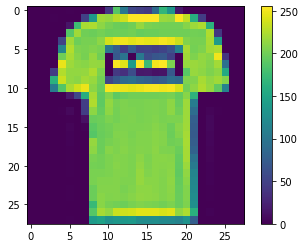

In [14]:
# Data Exploration
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()   # Here we have 256 pixel and image size is 28 x 28.

In [13]:
y_train[1]

0

In [15]:
# Normalizing the dataset, after the normalization neural network learn faster.
X_train = X_train/255.0
X_test = X_test/255.0

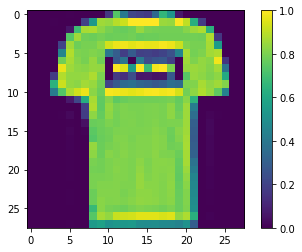

In [16]:
# After normalization pixel
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [17]:
# Flattening the dataset, means convert 2d array 28x28 into 1d arrays of X_train.
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
# reshape takes two arguments -1 means we are selecting all the 60000 images in the dataset.
# 28*28 convert into single dimension 784.
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [19]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# Building the Model

In [20]:
# Define an object
model = tf.keras.models.Sequential()

In [21]:
# adding first fully connected layer require three parameters.
# 1) units (No of neurons) = 128
# 2) ativation function = ReLU
# 3) input shape = 784
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

In [22]:
# adding the second layer with dropout. it prevent overfitting.
# Here we are dropping 30% of neurons
model.add(tf.keras.layers.Dropout(0.3))

In [23]:
# Adding the output layer
# we will add two parameters in output layer.
# 1) units (number of neurons) = 10   because of 10 classes.
# 2) activation = softmax.  (for multiple output)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training the Model

In [25]:
# Compile the model, we have to add three arguments
# 1) optimizer = adam , update the weights to minimize the loss function.
# 2) loss function = sparse_categorical_crossentropy, act as a guide for optimizer to reach global minima.
# 3) metrics = sparse_categorical_accuracy, for multiple output.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Training the model
# epochs means we are training our model 10 times.
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5507 - sparse_categorical_accuracy: 0.8062
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4189 - sparse_categorical_accuracy: 0.8486
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3860 - sparse_categorical_accuracy: 0.8594
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3652 - sparse_categorical_accuracy: 0.8667
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3504 - sparse_categorical_accuracy: 0.8716
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3379 - sparse_categorical_accuracy: 0.8760
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3288 - sparse_categorical_accuracy: 0.8773
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3213 - sparse_categorical_accuracy: 0.8810
Epoch 9/10
1875/1875 [==========

# Model evaluation and prediction

In [28]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.8731


In [29]:
print(f"Test accuarcy is : {test_accuracy}")

Test accuarcy is : 0.8730999827384949


In [31]:
# Model Prediction
y_pred = np.argmax(model.predict(X_test), axis=1)

In [32]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [35]:
# Predicted and actual output.
y_pred[0], y_test[0]  

(9, 9)

In [36]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [37]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[733,   1,  25,  35,   3,   1, 197,   0,   5,   0],
       [  4, 973,   0,  17,   3,   0,   2,   0,   1,   0],
       [  9,   1, 899,   6,  43,   0,  41,   0,   1,   0],
       [ 10,   9,  23, 887,  37,   0,  33,   0,   1,   0],
       [  0,   0, 195,  23, 691,   0,  90,   0,   1,   0],
       [  0,   0,   0,   0,   0, 972,   0,  18,   1,   9],
       [ 72,   0, 144,  27,  49,   0, 698,   0,  10,   0],
       [  0,   0,   0,   0,   0,  18,   0, 958,   0,  24],
       [  2,   0,   9,   4,   4,   3,   6,   3, 969,   0],
       [  1,   0,   0,   0,   0,  11,   0,  37,   0, 951]], dtype=int64)

In [38]:
# accuracy score
accuracy_score(y_test, y_pred)

0.8731